# Exercise 1
## Group members:
* Antonio Feltrin
* Giosuè Sardo Infirri
* Riccardo Tancredi
* Simone Toso

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout     # Dropout inactivate some neurons on the network
import tensorflow as tf

import matplotlib as mpl
import matplotlib.cm as cm
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

# number of data
N = 4000
# size of each sample
L = 2
# box size
B = 100

In [2]:
# a nonlinear function of a 2d array x
def f(x):
    r=0
    if x[0]>-25 and x[1]>-35 and x[0]+x[1] < 30:
        r=1
    if x[0]+x[1] > 50:
        r=1
    return r

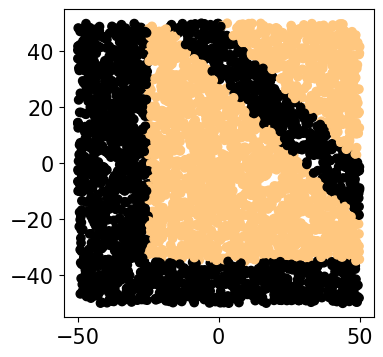

In [3]:
x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i])
        
plt.figure(figsize = (4,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap=cm.copper)
plt.show()

### Splitting train and test set

In [4]:
N_train = int(N*80/100) #take 80% of data as training
x_train, x_test = x[:N_train], x[N_train:]
y_train, y_test = y[:N_train], y[N_train:]

# 1.

In [5]:
def create_model(activation="relu"):                # model takes as input activation function; will be optimized using gridsearchCV
    model = Sequential()                            # start sequential list of layers
    model.add(Dense(L, input_shape=(L,), activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    # model.add(Dropout(0.01))                      # the Dropout is added only to the previous layer
    model.add(Dense(1, activation='sigmoid'))       # 1 to have one single output
    return model
    
# compile model function
def compile_model(optimizer="Adam", activation="relu"):   
    model = create_model(activation)
    model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

In [6]:
epochs = 200
batch_size = 50

Ora importiamo le librerie per la GridSearch, usiamo KerasClassifier per vedere il modello con le librerie di sklearn e facciamo la GridSearch.


In [7]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        verbose=1)

leaky_relu = tf.nn.leaky_relu

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['RMSprop', 'Adam']#, 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
activation = [leaky_relu, 'relu']#, 'sigmoid', 'elu', 'softmax', 'LeakyReLU'] 
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation=activation)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train)

C:\Users\ricta\AppData\Local\Temp\ipykernel_31992\1190385190.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=compile_model,


Epoch 1/200
48/48 [==============================] - 2s 8ms/step - loss: 0.6161 - accuracy: 0.6458
Epoch 2/200
48/48 [==============================] - 0s 10ms/step - loss: 0.5651 - accuracy: 0.6837
Epoch 3/200
48/48 [==============================] - 0s 10ms/step - loss: 0.5484 - accuracy: 0.6892
Epoch 4/200
48/48 [==============================] - 0s 9ms/step - loss: 0.5326 - accuracy: 0.7029
Epoch 5/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5207 - accuracy: 0.7221
Epoch 6/200
48/48 [==============================] - 1s 11ms/step - loss: 0.5053 - accuracy: 0.7604
Epoch 7/200
48/48 [==============================] - 1s 12ms/step - loss: 0.4894 - accuracy: 0.7746
Epoch 8/200
48/48 [==============================] - 0s 10ms/step - loss: 0.4725 - accuracy: 0.7967
Epoch 9/200
48/48 [==============================] - 0s 10ms/step - loss: 0.4580 - accuracy: 0.7971
Epoch 10/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4437 - accuracy: 0.8087
E

In [8]:
grid_result.cv_results_

{'mean_fit_time': array([102.0746606 ,  86.45765728, 126.97262818,  88.95571536]),
 'std_fit_time': array([ 2.82653922,  7.82097916, 11.05998927,  3.10723658]),
 'mean_score_time': array([0.31740075, 0.3841455 , 0.36206889, 0.77566743]),
 'std_score_time': array([0.03740432, 0.04160065, 0.04017205, 0.53572142]),
 'param_activation': masked_array(data=[<function leaky_relu at 0x0000016526ECDEE0>,
                    <function leaky_relu at 0x0000016526ECDEE0>, 'relu',
                    'relu'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_optimizer': masked_array(data=['RMSprop', 'Adam', 'RMSprop', 'Adam'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'activation': <function tensorflow.python.ops.nn_ops.leaky_relu(features, alpha=0.2, name=None)>,
   'optimizer': 'RMSprop'},
  {'activation': <function tensorflow.python.ops.nn_ops.leaky_relu(features, alp

In [9]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982500 using {'activation': <function leaky_relu at 0x0000016526ECDEE0>, 'optimizer': 'Adam'}
0.979063 (0.004951) with: {'activation': <function leaky_relu at 0x0000016526ECDEE0>, 'optimizer': 'RMSprop'}
0.982500 (0.004239) with: {'activation': <function leaky_relu at 0x0000016526ECDEE0>, 'optimizer': 'Adam'}
0.836250 (0.066773) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.818125 (0.047873) with: {'activation': 'relu', 'optimizer': 'Adam'}


In [10]:
best_fit_result = grid_result.best_estimator_.model.fit(x_train, y_train,
               epochs=epochs, batch_size=batch_size,
               validation_data=(x_test, y_test),
               verbose=2)

Epoch 1/200
64/64 - 1s - loss: 0.0461 - accuracy: 0.9806 - val_loss: 0.0338 - val_accuracy: 0.9837 - 1s/epoch - 16ms/step
Epoch 2/200
64/64 - 0s - loss: 0.0307 - accuracy: 0.9897 - val_loss: 0.0389 - val_accuracy: 0.9837 - 449ms/epoch - 7ms/step
Epoch 3/200
64/64 - 0s - loss: 0.0353 - accuracy: 0.9844 - val_loss: 0.0351 - val_accuracy: 0.9900 - 472ms/epoch - 7ms/step
Epoch 4/200
64/64 - 0s - loss: 0.0481 - accuracy: 0.9825 - val_loss: 0.0421 - val_accuracy: 0.9837 - 429ms/epoch - 7ms/step
Epoch 5/200
64/64 - 0s - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.0386 - val_accuracy: 0.9850 - 441ms/epoch - 7ms/step
Epoch 6/200
64/64 - 0s - loss: 0.0338 - accuracy: 0.9900 - val_loss: 0.0348 - val_accuracy: 0.9887 - 435ms/epoch - 7ms/step
Epoch 7/200
64/64 - 0s - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0315 - val_accuracy: 0.9900 - 442ms/epoch - 7ms/step
Epoch 8/200
64/64 - 0s - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0483 - val_accuracy: 0.9887 - 427ms/epoch - 7ms/step
Epoch 9/20

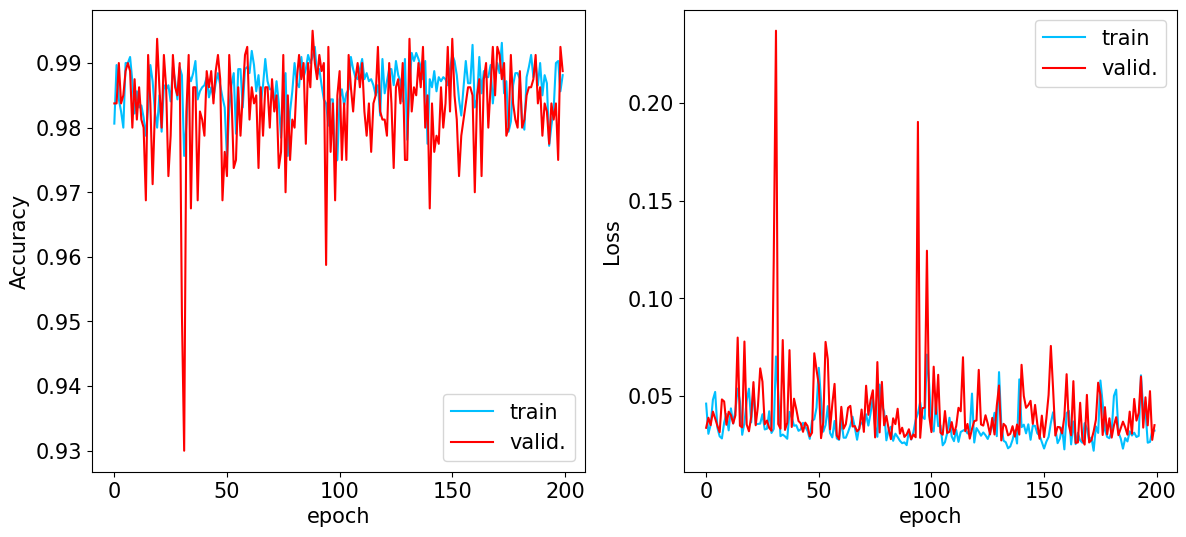

In [11]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(best_fit_result.history['accuracy'], label="train", c="deepskyblue")
ax.plot(best_fit_result.history['val_accuracy'], label="valid.", c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(best_fit_result.history['loss'], label="train", c="deepskyblue")
ax.plot(best_fit_result.history['val_loss'], label="valid.", c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.show()

# 2.

In [12]:
N_reduced = int(N/2)
# np.seed(12345+1)
N_increased = N*2

x_reduced, y_reduced = (np.random.random((N_reduced, 2))-0.5)*B, np.zeros(N_reduced)
for i in range(N_reduced):
    y_reduced[i] = f(x_reduced[i])

x_increased, y_increased = (np.random.random((N_increased, 2))-0.5)*B, np.zeros(N_increased)
for i in range(N_increased):
    y_increased[i] = f(x_increased[i])